In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

In [2]:
# 파일 가져오기

file_name = 'C:/Users/abc99/OneDrive/바탕 화면/2023 2학기 파일 전체 모음/딥러닝응용/raisin/Raisin_Dataset.xlsx'
df = pd.read_excel(file_name)
print(df)

      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.684130   1121.786  Kecimen  
2  

In [4]:
data = df

In [5]:
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [6]:
# data null값 측정하기

data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [8]:
# train, test set 분류하기

X = data
X = X.drop(columns=['Class'], axis=1)
y = data['Class']

In [9]:
from sklearn.preprocessing import LabelEncoder

# one - hot

le=LabelEncoder()
for i in data.columns:

    data[i]=le.fit_transform(data[i])
    
y1 = le.fit_transform(y)
Y = pd.get_dummies(y).values

print(data)

     Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  Extent  \
0     551              553              500           558         542     811   
1     404              446              409           469         413     299   
2     583              554              581           448         571     102   
3      74               54              159           108          68     394   
4     462              254              709            33         445     890   
..    ...              ...              ...           ...         ...     ...   
895   504              512              449           542         492     215   
896   549              546              540           508         549      99   
897   640              517              739           174         650     722   
898   600              633              506           683         600     177   
899   529              706              200           877         532      82   

     Perimeter  Class  
0  

In [10]:
# class 개수를 파악하기

data['Class'].value_counts()

1    450
0    450
Name: Class, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [12]:
X

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,551,553,500,558,542,811,544
1,404,446,409,469,413,299,453
2,583,554,581,448,571,102,573
3,74,54,159,108,68,394,66
4,462,254,709,33,445,890,382
...,...,...,...,...,...,...,...
895,504,512,449,542,492,215,461
896,549,546,540,508,549,99,577
897,640,517,739,174,650,722,656
898,600,633,506,683,600,177,622


In [13]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

# Dense층은 7개, 출력은 2개로 모델 구성

model = Sequential()

model.add(Dense(7,input_shape=(7,),activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(lr=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 2)                 16        
                                                                 
Total params: 184
Trainable params: 184
Non-trainable params: 0
_________________________________________________________________


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
# Epochs 100번으로 훈련

model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 1s 10ms/step - loss: 5.9757 - accuracy: 0.6792 - val_loss: 1.6082 - val_accuracy: 0.7389
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.9762 - accuracy: 0.7306 - val_loss: 0.5414 - val_accuracy: 0.8111
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.8069 - val_loss: 0.4172 - val_accuracy: 0.8444
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4406 - accuracy: 0.8000 - val_loss: 0.3800 - val_accuracy: 0.8556
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4302 - accuracy: 0.8153 - val_loss: 0.3556 - val_accuracy: 0.8500
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4310 - accuracy: 0.8153 - val_loss: 0.3818 - val_accuracy: 0.8611
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3984 - accuracy: 0.8264 - val_loss: 0.3549 - val_accuracy: 0.8611
Epoch 8/100


Epoch 59/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3447 - accuracy: 0.8611 - val_loss: 0.3121 - val_accuracy: 0.9056
Epoch 60/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3407 - accuracy: 0.8597 - val_loss: 0.2954 - val_accuracy: 0.8778
Epoch 61/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3283 - accuracy: 0.8597 - val_loss: 0.2967 - val_accuracy: 0.8778
Epoch 62/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3342 - accuracy: 0.8583 - val_loss: 0.3347 - val_accuracy: 0.8778
Epoch 63/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3467 - accuracy: 0.8569 - val_loss: 0.3514 - val_accuracy: 0.8611
Epoch 64/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3434 - accuracy: 0.8583 - val_loss: 0.3201 - val_accuracy: 0.9056
Epoch 65/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3400 - accuracy: 0.8597 - val_loss: 0.3214 - val_accuracy: 0.9000
Epoch 

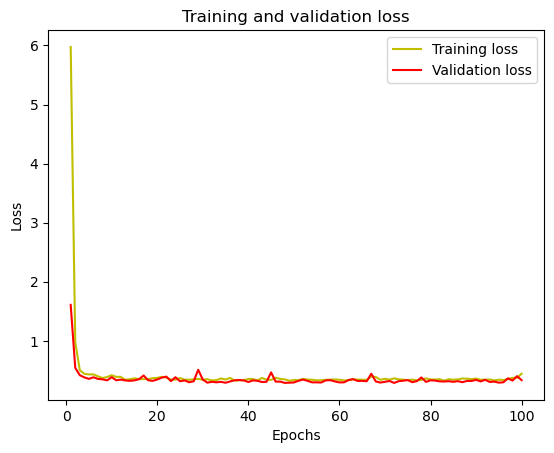

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

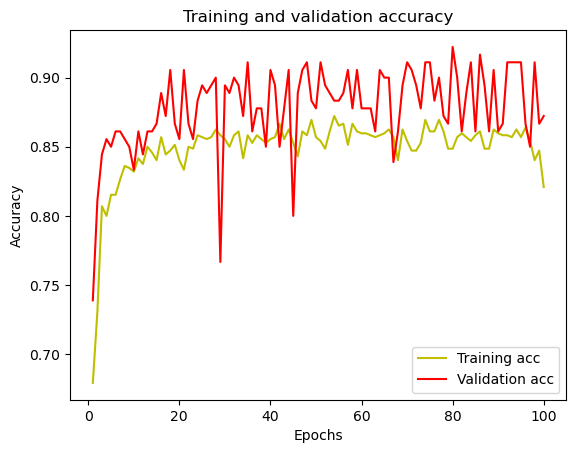

In [17]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# 정확도(predicted)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        97
           1       0.88      0.84      0.86        83

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180

[[87 10]
 [13 70]]
